In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/generated-data/fake_data.csv
/kaggle/input/machine-failure-prediction/ai4i2020.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/machine-failure-prediction/ai4i2020.csv')
del data['Product ID']
del data['Type']
data.head(5)


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.shape


(10000, 12)

In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE

features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine failure']
X = data[features]
y = data[label]

# Import train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine X_train_resampled and y_train_resampled into a single DataFrame
resampled_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Machine failure'])], axis=1)

# Check the class distribution before and after SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts().to_frame())

print("\nClass Distribution After SMOTE:")
print(resampled_data['Machine failure'].value_counts().to_frame())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Class Distribution Before SMOTE:
                    0
Machine failure      
0                7722
1                 278

Class Distribution After SMOTE:
   Machine failure
0             7722
1             7722


In [9]:
resampled_data.shape

(15444, 12)

In [10]:
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = resampled_data[features].values
y = resampled_data[label].values

# CNN

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = resampled_data[features].values
y = resampled_data[label].values

# Step 2: Preprocess the data (scaling, normalization, etc.)
# You can perform scaling, normalization, or any other preprocessing based on your data characteristics and requirements.

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into train and test sets

# Get the number of records in the train and test datasets
num_train_records = X_train.shape[0]
num_test_records = X_test.shape[0]

print(f"Number of records in the train dataset: {num_train_records}")
print(f"Number of records in the test dataset: {num_test_records}")
# Step 4: Create the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the trainingA data
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32)

# Step 7: Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print("Test accuracy:", accuracy)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Remove the extra dimension from y_test
y_test = y_test.ravel()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Number of records in the train dataset: 12355
Number of records in the test dataset: 3089
Epoch 1/15
387/387 [==============================] - 5s 4ms/step - loss: 3.4300 - accuracy: 0.6980
Epoch 2/15
387/387 [==============================] - 1s 4ms/step - loss: 1.4794 - accuracy: 0.7697
Epoch 3/15
387/387 [==============================] - 1s 4ms/step - loss: 0.9807 - accuracy: 0.8079
Epoch 4/15
387/387 [==============================] - 1s 4ms/step - loss: 1.5933 - accuracy: 0.8040
Epoch 5/15
387/387 [==============================] - 2s 4ms/step - loss: 0.7070 - accuracy: 0.8396
Epoch 6/15
387/387 [==============================] - 1s 4ms/step - loss: 0.7528 - accuracy: 0.8334
Epoch 7/15
387/387 [==============================] - 1s 4ms/step - loss: 0.8141 - accuracy: 0.8344
Epoch 8/15
387/387 [==============================] - 1s 4ms/step - loss: 0.5265 - accuracy: 0.8671
Epoch 9/15
387/387 [==============================] - 1s 4ms/step - loss: 0.8541 - accuracy: 0.8266
Epoch 10/1

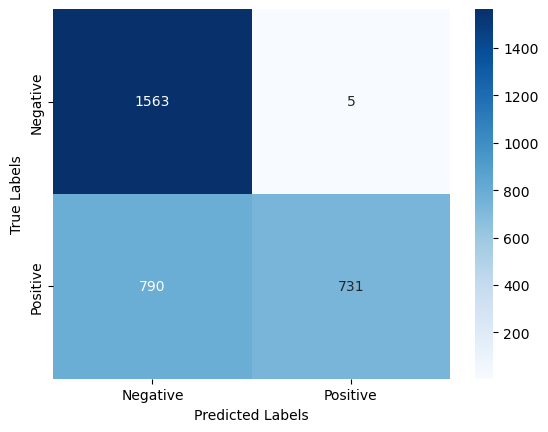

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = resampled_data[features].values
y = resampled_data[label].values
# Step 2: Preprocess the data (scaling, normalization, etc.)
# You can perform scaling, normalization, or any other preprocessing based on your data characteristics and requirements.

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
n_timesteps = 1  # Since there is no time step dimension, set it to 1
n_features = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

# Step 4: Create the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=15, batch_size=32)

# Step 7: Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/15
387/387 [==============================] - 4s 6ms/step - loss: 6.3030 - accuracy: 0.6760
Epoch 2/15
387/387 [==============================] - 3s 6ms/step - loss: 1.0436 - accuracy: 0.6903
Epoch 3/15
387/387 [==============================] - 3s 7ms/step - loss: 0.7151 - accuracy: 0.7113
Epoch 4/15
387/387 [==============================] - 3s 6ms/step - loss: 0.5220 - accuracy: 0.7603
Epoch 5/15
387/387 [==============================] - 2s 6ms/step - loss: 0.4547 - accuracy: 0.7958
Epoch 6/15
387/387 [==============================] - 2s 6ms/step - loss: 0.4144 - accuracy: 0.8261
Epoch 7/15
387/387 [==============================] - 3s 7ms/step - loss: 0.3662 - accuracy: 0.8407
Epoch 8/15
146/387 [==========>...................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8273

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# CNN On Generated Data 

In [ ]:
fake_data = pd.read_csv('/kaggle/input/generated-data/fake_data.csv')
fake_data.head()

In [ ]:
fake_data.shape

In [ ]:
pip install tensorflow


In [ ]:
features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine Failure']
X = fake_data[features]
y = fake_data[label]


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine Failure']
X = fake_data[features]
y = fake_data[label]

# Import train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine X_train_resampled and y_train_resampled into a single DataFrame
resampled_data1 = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Machine Failure'])], axis=1)

# Check the class distribution before and after SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts().to_frame())

print("\nClass Distribution After SMOTE:")
print(resampled_data1['Machine Failure'].value_counts().to_frame())

In [ ]:
resampled_data1.shape

# CNN

In [ ]:

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine Failure']

X = resampled_data1[features].values
y = resampled_data1[label].values
# Step 2: Preprocess the data (scaling, normalization, etc.)
# You can perform scaling, normalization, or any other preprocessing based on your data characteristics and requirements.

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
n_timesteps = 1  # Since there is no time step dimension, set it to 1
n_features = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

# Step 4: Create the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

# Step 8: Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already made predictions and converted them to binary using y_pred_binary

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()